Importing the Dependencies

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics

Data Collection and Processing

In [4]:
# loading the data from csv file to pandas dataframe
car_dataset = pd.read_csv(r'E:\Data analysis\Data analysis in petroleum\Projects\7- Linear Regression Model (Linear)\car data.csv')

In [66]:
# inspecting the first 5 rows of the dataframe
car_dataset.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [67]:
# statistical measures
car_dataset.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [68]:
# checking the number of rows and columns
car_dataset.shape

(205, 26)

In [69]:
# getting some information about the dataset
car_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [70]:
# checking the distribution of categorical data
print(car_dataset.CarName.value_counts())
print(car_dataset.aspiration.value_counts())
print(car_dataset.fueltype.value_counts())
print(car_dataset.doornumber.value_counts())
print(car_dataset.carbody.value_counts())
print(car_dataset.drivewheel.value_counts())
print(car_dataset.enginelocation.value_counts())
print(car_dataset.enginetype.value_counts())
print(car_dataset.cylindernumber.value_counts())
print(car_dataset.fuelsystem.value_counts())

toyota corona           6
toyota corolla          6
peugeot 504             6
subaru dl               4
mitsubishi mirage g4    3
                       ..
mazda glc 4             1
mazda rx2 coupe         1
maxda glc deluxe        1
maxda rx3               1
volvo 246               1
Name: CarName, Length: 147, dtype: int64
std      168
turbo     37
Name: aspiration, dtype: int64
gas       185
diesel     20
Name: fueltype, dtype: int64
four    115
two      90
Name: doornumber, dtype: int64
sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: carbody, dtype: int64
fwd    120
rwd     76
4wd      9
Name: drivewheel, dtype: int64
front    202
rear       3
Name: enginelocation, dtype: int64
ohc      148
ohcf      15
ohcv      13
dohc      12
l         12
rotor      4
dohcv      1
Name: enginetype, dtype: int64
four      159
six        24
five       11
eight       5
two         4
three       1
twelve      1
Name: cylindernumber, dtype: int64
mpfi  

Encoding the Categorical Data

In [71]:
# encoding Object Columns
Label_Encoder = LabelEncoder()
car_dataset['CarName']= Label_Encoder.fit_transform(car_dataset["CarName"])
car_dataset['fueltype']= Label_Encoder.fit_transform(car_dataset["fueltype"])
car_dataset['aspiration']= Label_Encoder.fit_transform(car_dataset["aspiration"])
car_dataset['doornumber']= Label_Encoder.fit_transform(car_dataset["doornumber"])
car_dataset['carbody']= Label_Encoder.fit_transform(car_dataset["carbody"])
car_dataset['drivewheel']= Label_Encoder.fit_transform(car_dataset["drivewheel"])
car_dataset['enginelocation']= Label_Encoder.fit_transform(car_dataset["enginelocation"])
car_dataset['enginetype']= Label_Encoder.fit_transform(car_dataset["enginetype"])
car_dataset['cylindernumber']= Label_Encoder.fit_transform(car_dataset["cylindernumber"])
car_dataset['fuelsystem']= Label_Encoder.fit_transform(car_dataset["fuelsystem"])

In [72]:
car_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    int32  
 3   fueltype          205 non-null    int32  
 4   aspiration        205 non-null    int32  
 5   doornumber        205 non-null    int32  
 6   carbody           205 non-null    int32  
 7   drivewheel        205 non-null    int32  
 8   enginelocation    205 non-null    int32  
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    int32  
 15  cylindernumber    205 non-null    int32  
 16  enginesize        205 non-null    int64  
 1

In [73]:
car_dataset.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,2,1,0,1,0,2,0,88.6,...,130,5,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,3,1,0,1,0,2,0,88.6,...,130,5,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,1,1,0,1,2,2,0,94.5,...,152,5,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,4,1,0,0,3,1,0,99.8,...,109,5,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,5,1,0,0,3,0,0,99.4,...,136,5,3.19,3.40,8.0,115,5500,18,22,17450.0


Splitting the data and Target

In [74]:
X = car_dataset.drop(['price'],axis=1)
Y = car_dataset['price']

In [75]:
print(X)

     car_ID  symboling  CarName  fueltype  aspiration  doornumber  carbody  \
0         1          3        2         1           0           1        0   
1         2          3        3         1           0           1        0   
2         3          1        1         1           0           1        2   
3         4          2        4         1           0           0        3   
4         5          2        5         1           0           0        3   
..      ...        ...      ...       ...         ...         ...      ...   
200     201         -1      139         1           0           0        3   
201     202         -1      138         1           1           0        3   
202     203         -1      140         1           0           0        3   
203     204         -1      142         0           1           0        3   
204     205         -1      143         1           1           0        3   

     drivewheel  enginelocation  wheelbase  ...  cylindernumber

In [76]:
print(Y)

0      13495.0
1      16500.0
2      16500.0
3      13950.0
4      17450.0
        ...   
200    16845.0
201    19045.0
202    21485.0
203    22470.0
204    22625.0
Name: price, Length: 205, dtype: float64


Splitting Training and Test data

In [77]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.1, random_state=2)

Model Training

1. Linear Regression

In [78]:
# loading the linear regression model
lin_reg_model = LinearRegression()

In [79]:
lin_reg_model.fit(X_train,Y_train)

LinearRegression()

Model Evaluation

In [80]:
# prediction on Training data
training_data_prediction = lin_reg_model.predict(X_train)

In [81]:
# R squared Error
error_score = metrics.r2_score(Y_train, training_data_prediction)
print(f"R squared Error : {error_score}")

R squared Error : 0.8978224515245736


Visualize the actual prices and Predicted prices

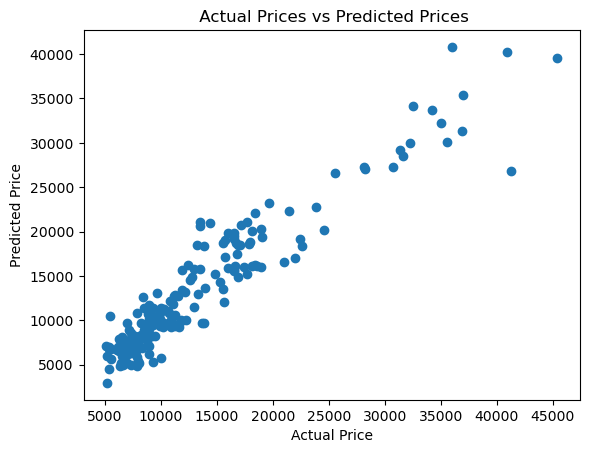

In [82]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

In [94]:
# prediction on Training data
test_data_prediction = lin_reg_model.predict(X_test)

In [96]:
# R squared Error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print(f"R squared Error : {error_score}")

R squared Error : 0.901152340636856


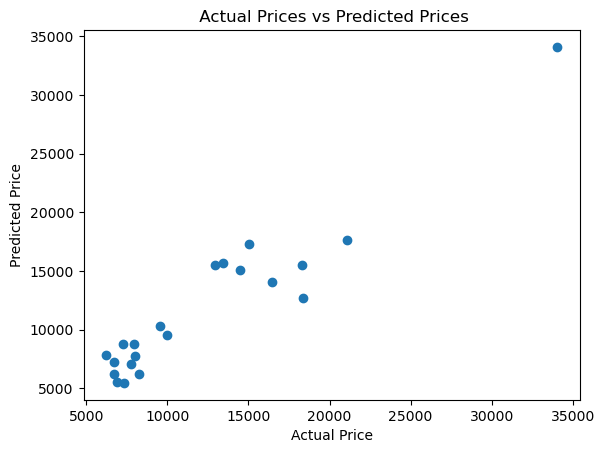

In [97]:
plt.scatter(Y_test, test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

2. Lasso Regression

In [98]:
# loading the linear regression model
lass_reg_model = Lasso()

In [99]:
lass_reg_model.fit(X_train,Y_train)

Lasso()

Model Evaluation

In [103]:
# prediction on Training data
training_data_prediction = lass_reg_model.predict(X_train)

In [105]:
# R squared Error
error_score = metrics.r2_score(Y_train, training_data_prediction)
print(f"R squared Error : {error_score}")

R squared Error : 0.8978129645954822


Visualize the actual prices and Predicted prices

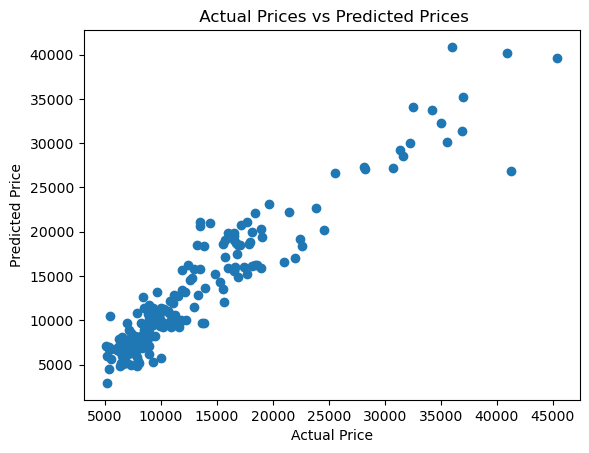

In [106]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

In [107]:
# prediction on Training data
test_data_prediction = lass_reg_model.predict(X_test)

In [109]:
# R squared Error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.901485489134832


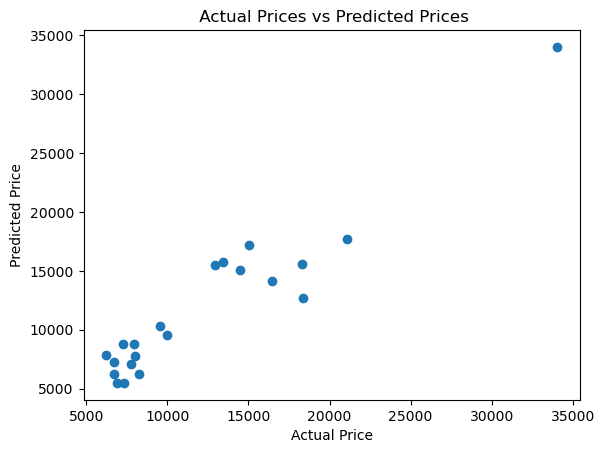

In [110]:
plt.scatter(Y_test, test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()